In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('C:/Users/ASUS/Downloads/Data Analytics project/Bowling_performance.csv')

<Axes: xlabel='Class', ylabel='count'>

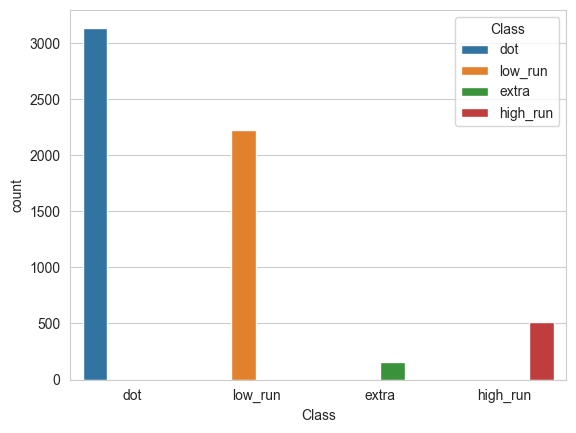

In [3]:
sns.set_style('whitegrid')
sns.countplot(x='Class',hue='Class',data=data)

In [4]:
data

Name  Height/m Soil Type Match Location Match Date   
0     Kagiso Kabada      1.91    podzol        Colombo  12/8/2018  \
1     Kagiso Kabada      1.91    podzol        Colombo  12/8/2018   
2     Kagiso Kabada      1.91    podzol        Colombo  12/8/2018   
3     Kagiso Kabada      1.91    podzol        Colombo  12/8/2018   
4     Kagiso Kabada      1.91    podzol        Colombo  12/8/2018   
...             ...       ...       ...            ...        ...   
6025      Moeen Ali      1.83      clay   Bloemfontein   3/3/2016   
6026      Moeen Ali      1.83      clay   Bloemfontein   3/3/2016   
6027      Moeen Ali      1.83      clay   Bloemfontein   3/3/2016   
6028      Moeen Ali      1.83      clay   Bloemfontein   3/3/2016   
6029      Moeen Ali      1.83      clay   Bloemfontein   3/3/2016   

     Temperature/F Humidity/% Dew Point/F Wind Speed/mph  Age /years  ...   
0             high       high        high            low          23  ...  \
1             high       high        high            low          23  ...   
2             high       high        high            low          23  ...   
3             high       high        high            low          23  ...   
4             high       high        high            low          23  ...   
...            ...        ...         ...            ...         ...  ...   
6025          high     medium      medium         medium          30  ...   
6026          high     medium      medium         medium          30  ...   
6027          high     medium      medium         medium          30  ...   
6028          high     medium      medium         medium          30  ...   
6029          high     medium      medium         medium          30  ...   

     Balls  Runs Wkts    Ave  Econ    SR 4w  5w  10    Class  
0     3374  2802  106  26.43  4.98  31.8  6   1   0      dot  
1     3374  2802  106  26.43  4.98  31.8  6   1   0      dot  
2     3374  2802  106  26.43  4.98  31.8  6   1   0      dot  
3     3374  2802  106  26.43  4.98  31.8  6   1   0      dot  
4     3374  2802  106  26.43  4.98  31.8  6   1   0  low_run  
...    ...   ...  ...    ...   ...   ... ..  ..  ..      ...  
6025  4216  3668   78  47.02  5.22  54.0  1   0   0  low_run  
6026  4216  3668   78  47.02  5.22  54.0  1   0   0      dot  
6027  4216  3668   78  47.02  5.22  54.0  1   0   0  low_run  
6028  4216  3668   78  47.02  5.22  54.0  1   0   0      dot  
6029  4216  3668   78  47.02  5.22  54.0  1   0   0      dot  

[6030 rows x 30 columns]

In [5]:
data.head(5)

Name  Height/m Soil Type Match Location Match Date Temperature/F   
0  Kagiso Kabada      1.91    podzol        Colombo  12/8/2018          high  \
1  Kagiso Kabada      1.91    podzol        Colombo  12/8/2018          high   
2  Kagiso Kabada      1.91    podzol        Colombo  12/8/2018          high   
3  Kagiso Kabada      1.91    podzol        Colombo  12/8/2018          high   
4  Kagiso Kabada      1.91    podzol        Colombo  12/8/2018          high   

  Humidity/% Dew Point/F Wind Speed/mph  Age /years  ... Balls  Runs Wkts   
0       high        high            low          23  ...  3374  2802  106  \
1       high        high            low          23  ...  3374  2802  106   
2       high        high            low          23  ...  3374  2802  106   
3       high        high            low          23  ...  3374  2802  106   
4       high        high            low          23  ...  3374  2802  106   

     Ave  Econ    SR 4w  5w  10    Class  
0  26.43  4.98  31.8  6   1   0      dot  
1  26.43  4.98  31.8  6   1   0      dot  
2  26.43  4.98  31.8  6   1   0      dot  
3  26.43  4.98  31.8  6   1   0      dot  
4  26.43  4.98  31.8  6   1   0  low_run  

[5 rows x 30 columns]

In [6]:
# Find missing values in the DataFrame
missing_values = data.isna().sum()
print("Missing values in the DataFrame:")
print(missing_values)

Missing values in the DataFrame:
Name                0
Height/m          112
Soil Type         114
Match Location      0
Match Date          0
Temperature/F       0
Humidity/%         54
Dew Point/F        45
Wind Speed/mph    108
Age /years          0
 Ball Type          0
Status              0
Over                0
Speed/mph         358
Wicket              0
Direction         202
side              170
Innings             0
Mat                 0
Inns                0
Balls               0
Runs                0
Wkts                0
Ave                 0
Econ                0
SR                  0
4w                  0
5w                  0
10                  0
Class               8
dtype: int64


<Axes: >

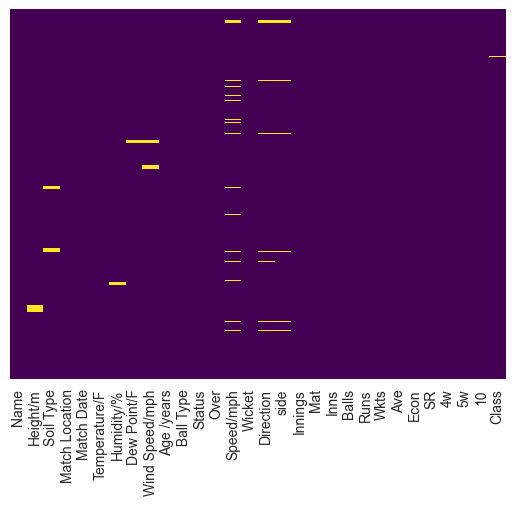

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

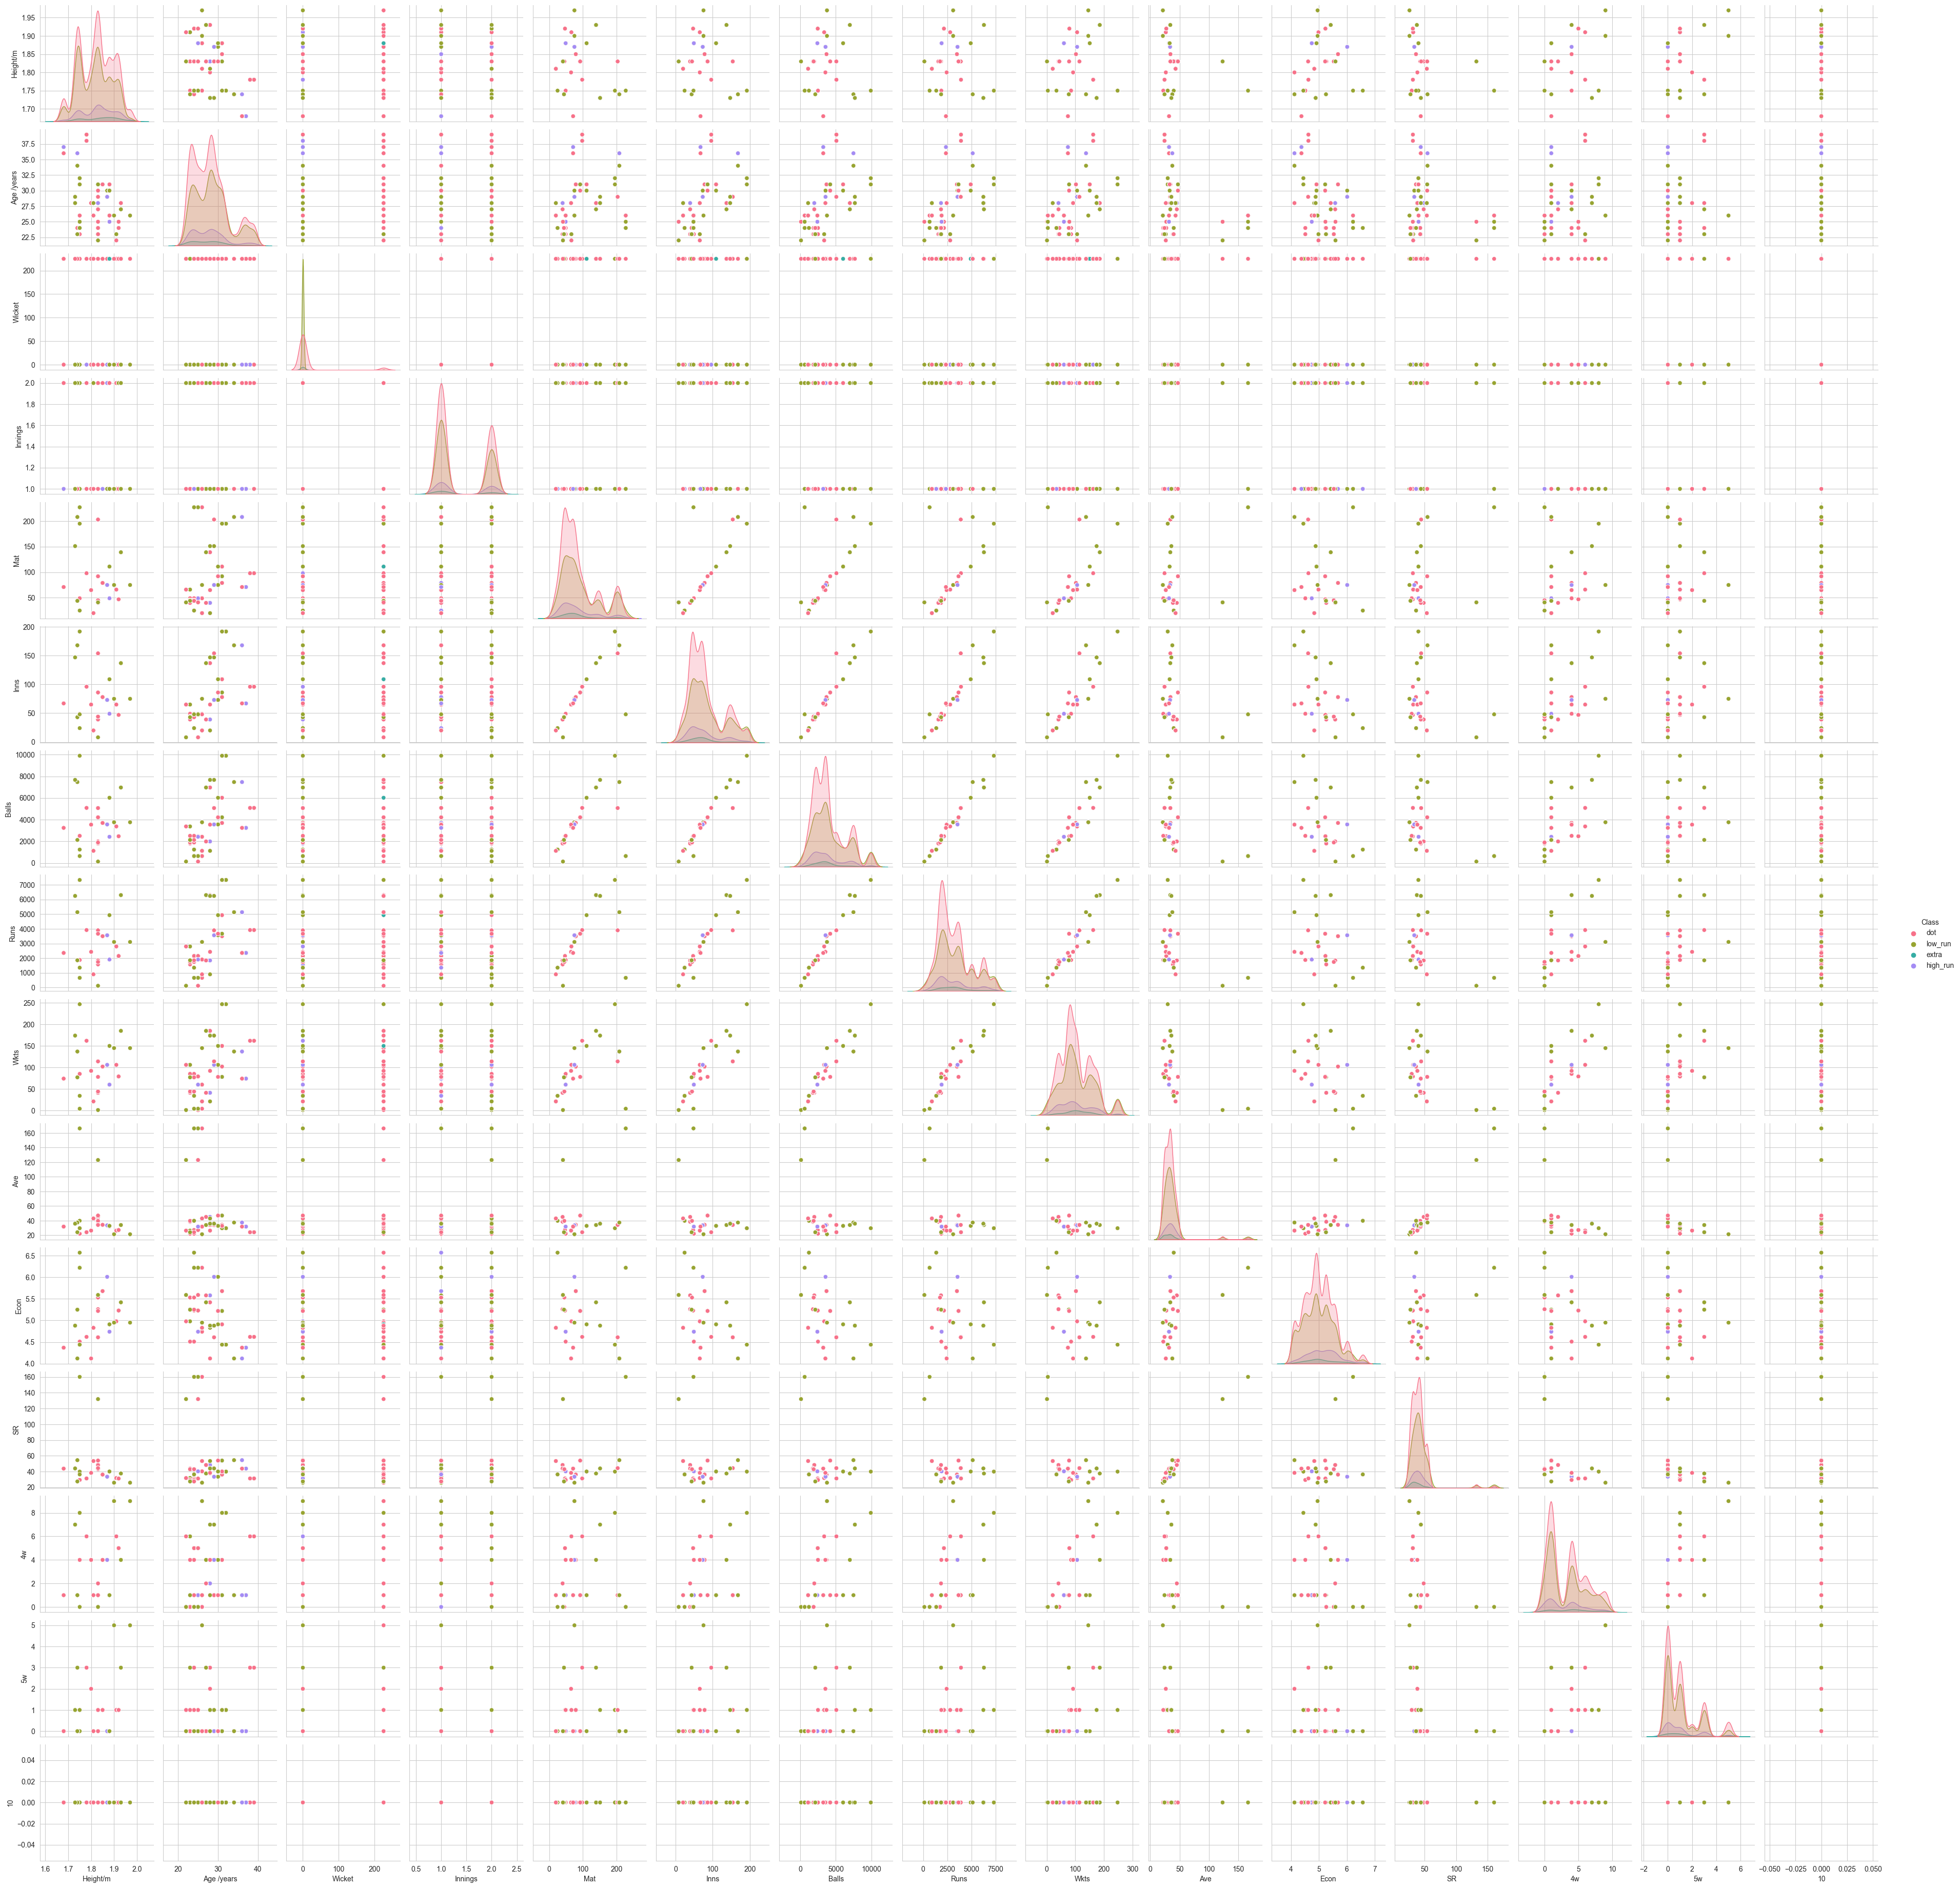

In [8]:
sns.pairplot(data, hue='Class',palette='husl')

In [9]:
# Drop irrelevant columns
data = data.drop(["Name", "Match Date"], axis=1)

#drop those column which contains at least half of total null values
for column in data.columns:
    if missing_values[column] * 2 >= data.count().max():
        data.drop(column, axis=1, inplace=True)

print(data.columns)

Index(['Height/m', 'Soil Type', 'Match Location', 'Temperature/F',
       'Humidity/%', 'Dew Point/F', 'Wind Speed/mph', 'Age /years',
       ' Ball Type', 'Status', 'Over', 'Speed/mph', 'Wicket', 'Direction',
       'side', 'Innings', 'Mat', 'Inns', 'Balls', 'Runs', 'Wkts', 'Ave',
       'Econ', 'SR', '4w', '5w', '10', 'Class'],
      dtype='object')


In [10]:
categorical_variable = []
contineous_variable = []

for column in data.columns:
    if data[column].dtype != 'object':
        contineous_variable.append(column)
    else:
        categorical_variable.append(column)

print(categorical_variable)
print(contineous_variable)      

['Soil Type', 'Match Location', 'Temperature/F', 'Humidity/%', 'Dew Point/F', 'Wind Speed/mph', ' Ball Type', 'Status', 'Over', 'Speed/mph', 'Direction', 'side', 'Class']
['Height/m', 'Age /years', 'Wicket', 'Innings', 'Mat', 'Inns', 'Balls', 'Runs', 'Wkts', 'Ave', 'Econ', 'SR', '4w', '5w', '10']


In [11]:

for column in categorical_variable:
    if missing_values[column] > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)

for column in contineous_variable:
    if missing_values[column] > 0:
        data[column].fillna(data[column].mean(), inplace=True)

In [12]:
print(data.columns)

Index(['Height/m', 'Soil Type', 'Match Location', 'Temperature/F',
       'Humidity/%', 'Dew Point/F', 'Wind Speed/mph', 'Age /years',
       ' Ball Type', 'Status', 'Over', 'Speed/mph', 'Wicket', 'Direction',
       'side', 'Innings', 'Mat', 'Inns', 'Balls', 'Runs', 'Wkts', 'Ave',
       'Econ', 'SR', '4w', '5w', '10', 'Class'],
      dtype='object')


In [13]:
# Find missing values in the DataFrame
missing_values = data.isna().sum()
print("Missing values in the DataFrame:")
print(missing_values)

Missing values in the DataFrame:
Height/m          0
Soil Type         0
Match Location    0
Temperature/F     0
Humidity/%        0
Dew Point/F       0
Wind Speed/mph    0
Age /years        0
 Ball Type        0
Status            0
Over              0
Speed/mph         0
Wicket            0
Direction         0
side              0
Innings           0
Mat               0
Inns              0
Balls             0
Runs              0
Wkts              0
Ave               0
Econ              0
SR                0
4w                0
5w                0
10                0
Class             0
dtype: int64


<Axes: >

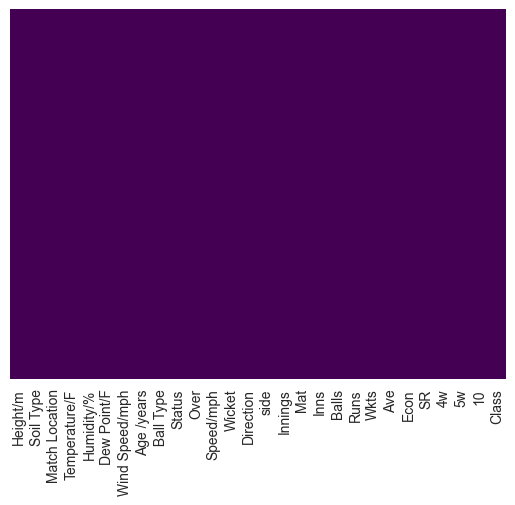

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
print(data['Class'].value_counts())

Class
dot         3146
low_run     2221
high_run     509
extra        154
Name: count, dtype: int64


In [16]:
original_df = data

In [17]:
# Define significance level
alpha = 0.05

# Loop over each column and calculate the chi-square statistic
for col in categorical_variable:
    contingency_table = pd.crosstab(data[col], data['Class'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Column {col}: chi2={chi2}, p_value={p_value}")
    if p_value > alpha:
        print(f"Column {col} is not significantly related to the target and will be removed.")
        data.drop(col, axis=1, inplace=True)

# Print the updated dataset
print(data)

Column Soil Type: chi2=215.369137474982, p_value=3.763466974072147e-11
Column Match Location: chi2=337.1092723158592, p_value=6.86497622644416e-16
Column Temperature/F: chi2=40.798106989177825, p_value=3.1732927413014345e-07
Column Humidity/%: chi2=12.124138319620553, p_value=0.05925604187628598
Column Humidity/% is not significantly related to the target and will be removed.
Column Dew Point/F: chi2=31.427129564359596, p_value=2.1006109675832576e-05
Column Wind Speed/mph: chi2=2.4507337652968677, p_value=0.8739400837289483
Column Wind Speed/mph is not significantly related to the target and will be removed.
Column  Ball Type: chi2=86.24939125837768, p_value=6.760093429685309e-11
Column Status: chi2=105.75179573916878, p_value=4.126976905007977e-17
Column Over: chi2=161.51121487328908, p_value=2.833709862745225e-32
Column Speed/mph: chi2=1519.2024906846934, p_value=0.03631320808155841
Column Direction: chi2=55.77213148174121, p_value=1.3153906962106153e-07
Column side: chi2=5.899274785

In [18]:
# Convert categorical variables into numeric
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col].astype(str))

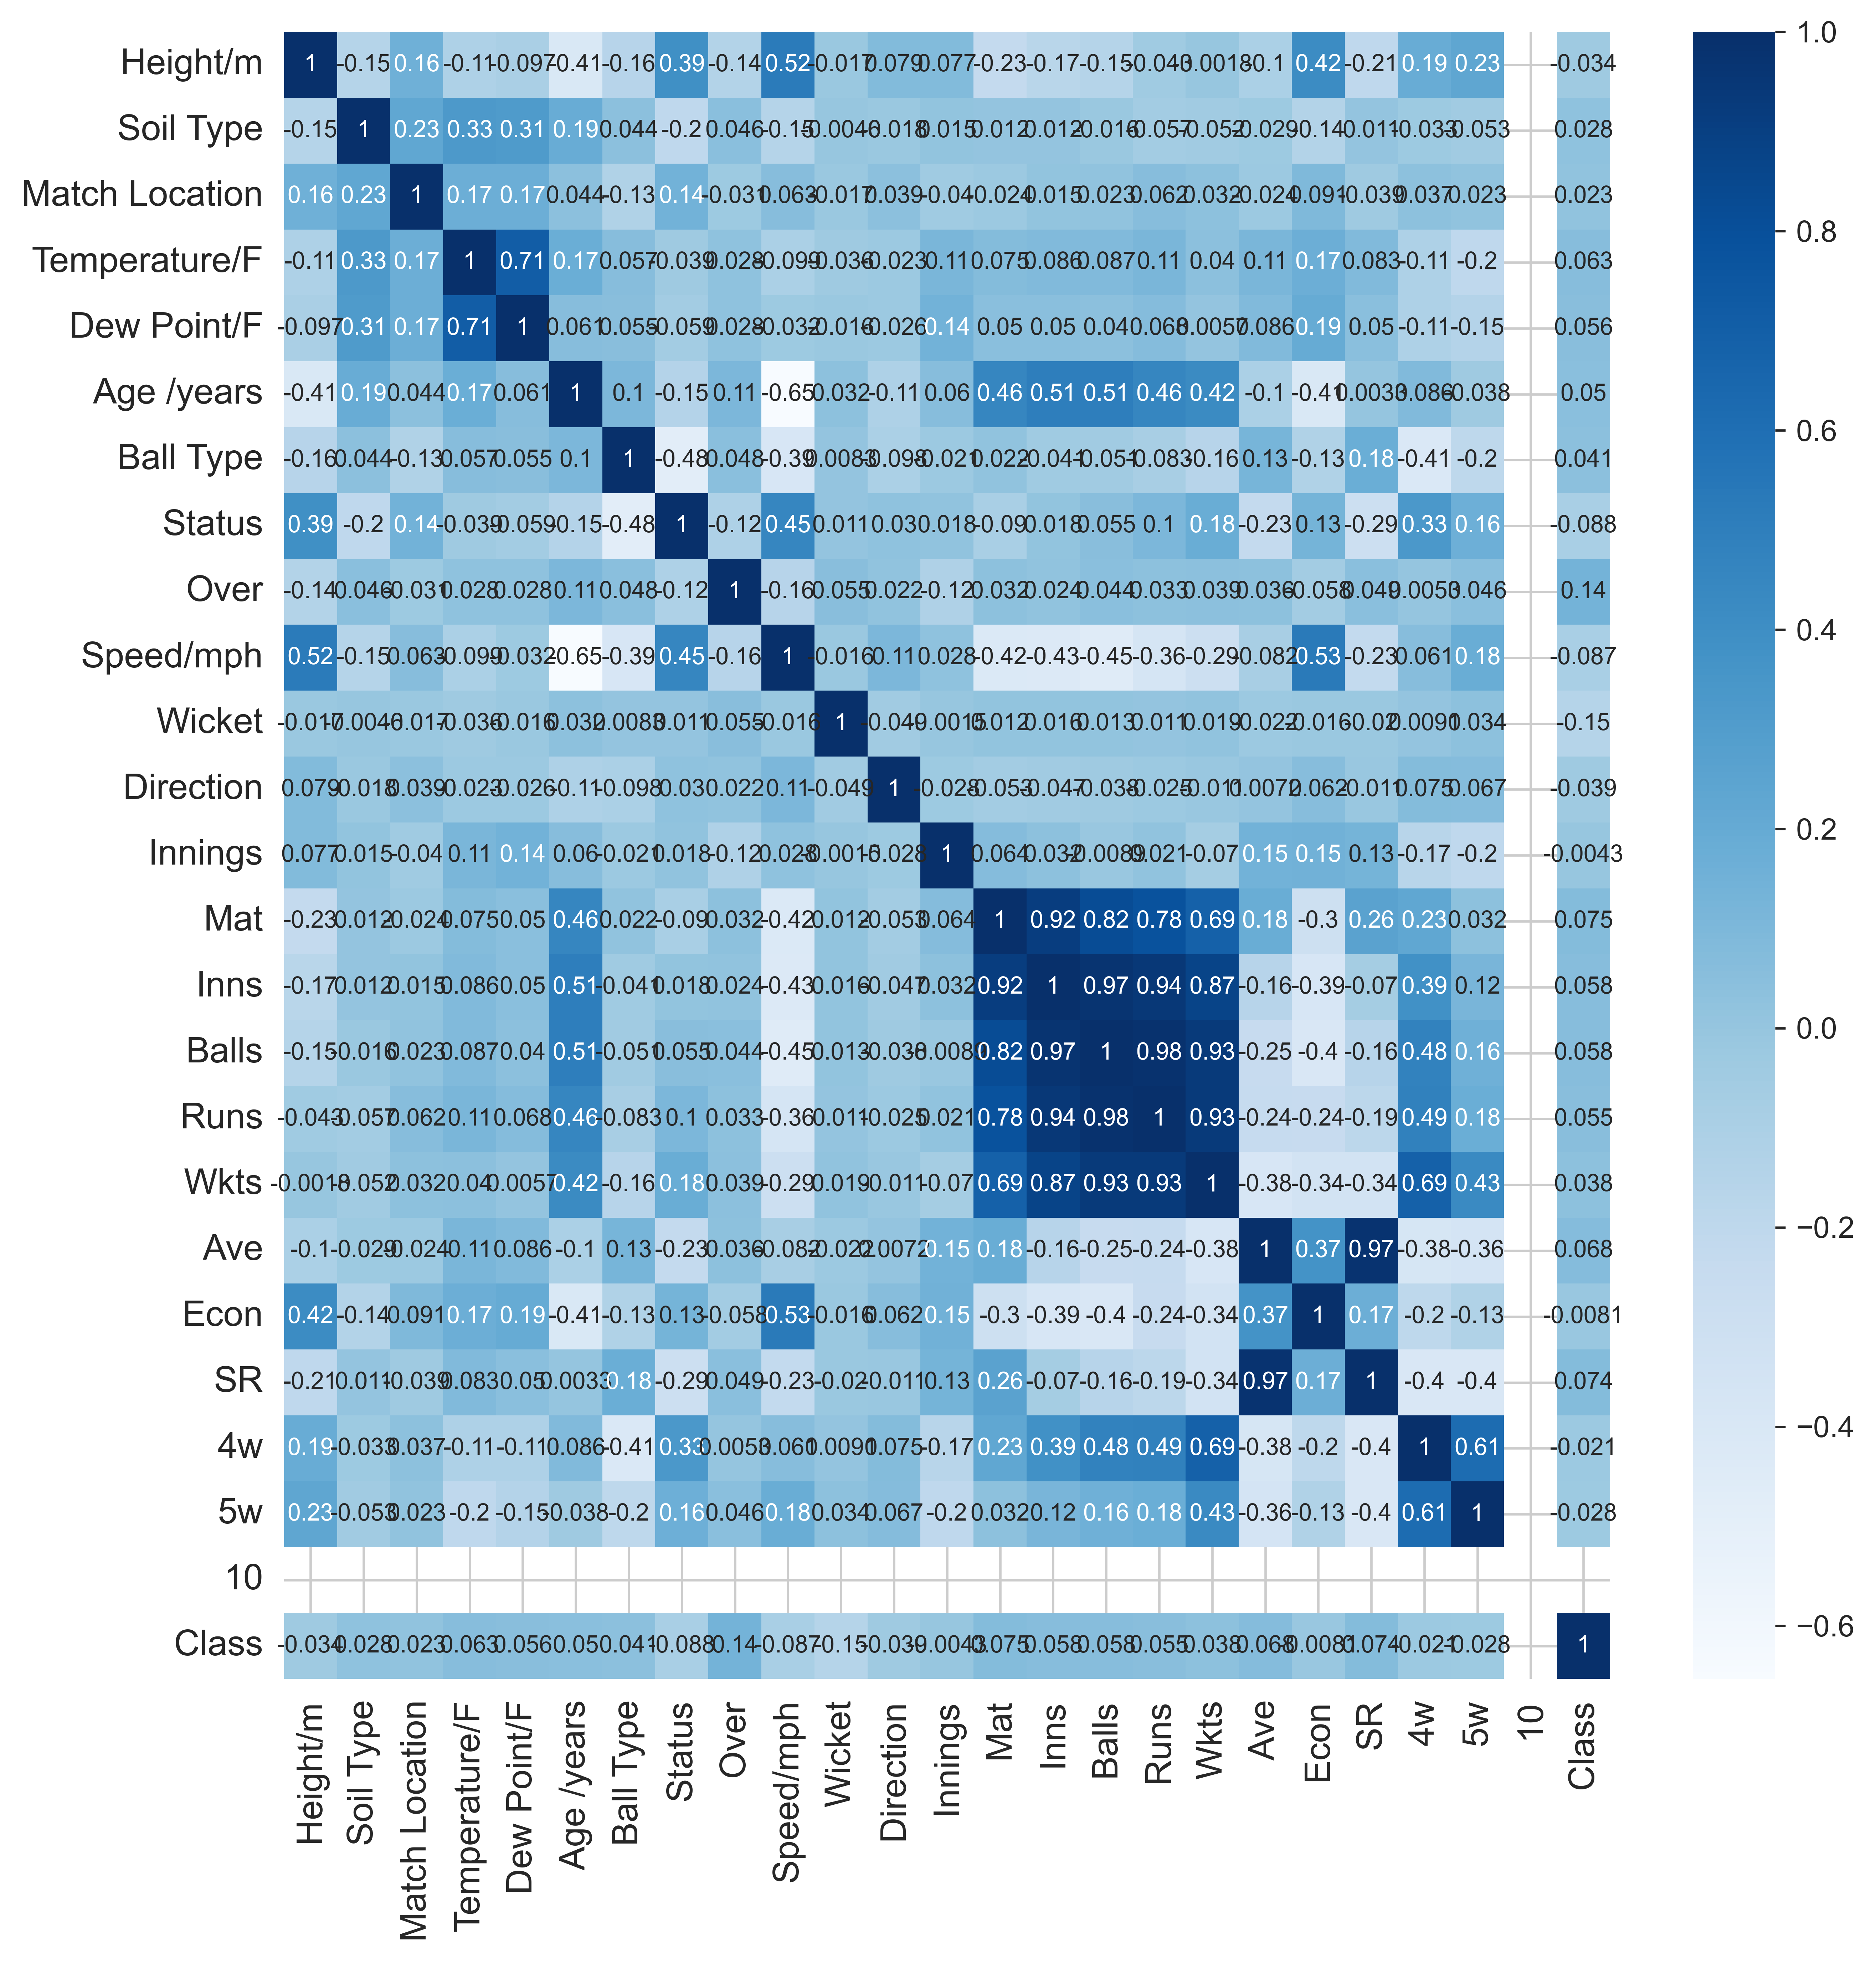

In [19]:
corr = data.corr() #your dataframe

# figsize=(8, 8) control width and height
# dpi = 600, I 
plt.figure(figsize=(10, 10), 
           dpi = 600) 
 
# parameter annot_kws={"size": 8} control corr values font size
sns.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 8})

plt.tick_params(axis = 'x', labelsize = 12) # x font label size
plt.tick_params(axis = 'y', labelsize = 12) # y font label size

In [20]:
# Split the data into features and target
X = data.drop("Class", axis=1)
y = data['Class']

In [21]:
print(data['Class'].value_counts())

Class
0    3146
3    2221
2     509
1     154
Name: count, dtype: int64


In [22]:
from imblearn.over_sampling import SMOTE

# Instantiate a SMOTE object
smote = SMOTE(random_state=42)

# Resample the dataset using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the number of samples in each class after resampling
print("Before SMOTE:")
print("Number of positive examples: {}".format(sum(y == 1)))
print("Number of negative examples: {}".format(sum(y == 0)))

print("After SMOTE:")
print("Number of positive examples: {}".format(sum(y_resampled == 1)))
print("Number of negative examples: {}".format(sum(y_resampled == 0)))

Before SMOTE:
Number of positive examples: 154
Number of negative examples: 3146
After SMOTE:
Number of positive examples: 3146
Number of negative examples: 3146


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit and transform the data
scaled_X_resampled = scaler.fit_transform(X_resampled)


In [24]:
# Split the data into features and target
X = data.drop("Class", axis=1)
y = data['Class']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(scaled_X_resampled, y_resampled, test_size=0.20, random_state=42)

In [25]:
# Create an instance of Random Forest Classifier
#
forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)

In [26]:
# Fit the model
#
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=1)

In [27]:
# Make predictions on the testing data
y_pred = forest.predict(X_test)

In [28]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.66507747318236


In [29]:
# cm = confusion_matrix(y_test, y_pred)
# cm
# Print the confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[323  31  85 216]
 [ 29 565   9  28]
 [ 63  30 469  47]
 [183  41  81 317]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.52       655
           1       0.85      0.90      0.87       631
           2       0.73      0.77      0.75       609
           3       0.52      0.51      0.52       622

    accuracy                           0.67      2517
   macro avg       0.66      0.67      0.66      2517
weighted avg       0.66      0.67      0.66      2517



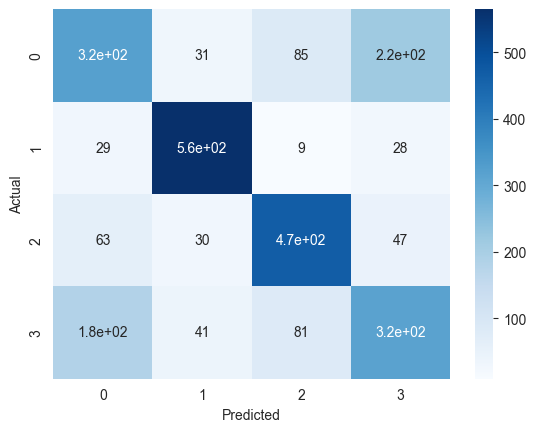

In [30]:
# Visualize the confusion matrix using a heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

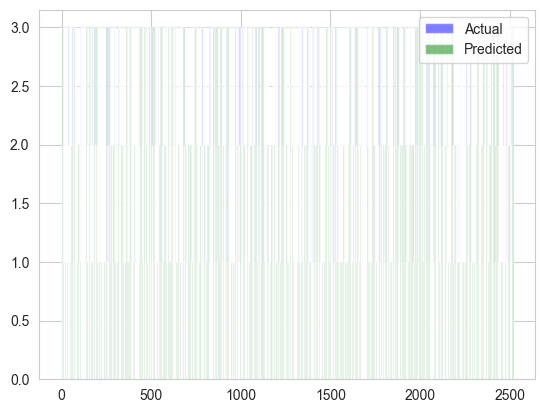

In [33]:
# Visualize the predictions using a bar chart
plt.bar(range(len(y_test)), y_test, color='blue', alpha=0.5)
plt.bar(range(len(y_test)), y_pred, color='green', alpha=0.5)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [34]:
# Kmeans

In [35]:
from sklearn.cluster import KMeans

# Cluster the data using KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(data)

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20)

In [36]:
# Add the cluster labels to the dataframe
data['cluster'] = kmeans.labels_

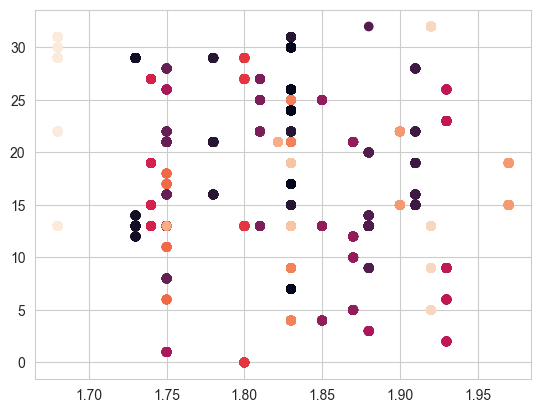

In [37]:
# Optional: visualize the clusters using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_)
plt.show()

In [38]:
#LSTM

In [39]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [40]:
dataset = data
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_data, test_data = dataset.iloc[0:train_size,:], dataset.iloc[train_size:len(dataset),:]


In [41]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10
train_X, train_y = create_sequences(train_data.values, seq_length)
test_X, test_y = create_sequences(test_data.values, seq_length)


In [42]:
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=2)

# Evaluate the model on the test set
scores = model.evaluate(test_X, test_y, verbose=0)
print('Mean Squared Error:', scores)


Epoch 1/100
151/151 - 4s - loss: 0.1012 - val_loss: 9.6640e-04 - 4s/epoch - 29ms/step
Epoch 2/100
151/151 - 2s - loss: 0.0012 - val_loss: 8.9749e-04 - 2s/epoch - 12ms/step
Epoch 3/100
151/151 - 2s - loss: 9.9670e-04 - val_loss: 7.4978e-04 - 2s/epoch - 10ms/step
Epoch 4/100
151/151 - 2s - loss: 8.0694e-04 - val_loss: 8.2405e-04 - 2s/epoch - 12ms/step
Epoch 5/100
151/151 - 1s - loss: 6.2297e-04 - val_loss: 4.7480e-04 - 1s/epoch - 10ms/step
Epoch 6/100
151/151 - 2s - loss: 4.5904e-04 - val_loss: 2.0821e-04 - 2s/epoch - 11ms/step
Epoch 7/100
151/151 - 2s - loss: 3.2915e-04 - val_loss: 2.6099e-04 - 2s/epoch - 12ms/step
Epoch 8/100
151/151 - 1s - loss: 2.3947e-04 - val_loss: 2.1238e-04 - 1s/epoch - 10ms/step
Epoch 9/100
151/151 - 1s - loss: 1.8215e-04 - val_loss: 7.4932e-05 - 1s/epoch - 10ms/step
Epoch 10/100
151/151 - 2s - loss: 1.5229e-04 - val_loss: 5.7863e-05 - 2s/epoch - 12ms/step
Epoch 11/100
151/151 - 2s - loss: 1.4014e-04 - val_loss: 4.8757e-05 - 2s/epoch - 12ms/step
Epoch 12/100
151

Epoch 92/100
151/151 - 2s - loss: 6.1807e-05 - val_loss: 1.8731e-05 - 2s/epoch - 11ms/step
Epoch 93/100
151/151 - 2s - loss: 7.0158e-05 - val_loss: 2.3737e-05 - 2s/epoch - 12ms/step
Epoch 94/100
151/151 - 2s - loss: 6.2565e-05 - val_loss: 4.3269e-05 - 2s/epoch - 12ms/step
Epoch 95/100
151/151 - 1s - loss: 7.3503e-05 - val_loss: 2.5697e-05 - 1s/epoch - 9ms/step
Epoch 96/100
151/151 - 2s - loss: 6.1067e-05 - val_loss: 3.1440e-05 - 2s/epoch - 12ms/step
Epoch 97/100
151/151 - 2s - loss: 5.9837e-05 - val_loss: 2.1155e-05 - 2s/epoch - 12ms/step
Epoch 98/100
151/151 - 2s - loss: 6.6897e-05 - val_loss: 1.7067e-05 - 2s/epoch - 12ms/step
Epoch 99/100
151/151 - 2s - loss: 7.0995e-05 - val_loss: 1.8017e-04 - 2s/epoch - 12ms/step
Epoch 100/100
151/151 - 2s - loss: 6.4521e-05 - val_loss: 2.1325e-05 - 2s/epoch - 12ms/step
Mean Squared Error: 2.1324909539544024e-05


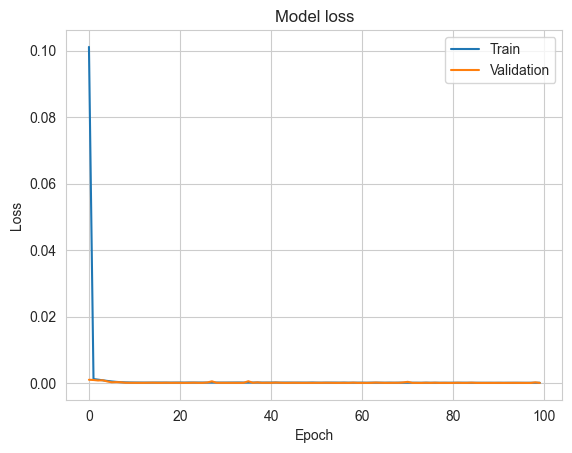

In [43]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


38/38 [==============================] - 1s 4ms/step


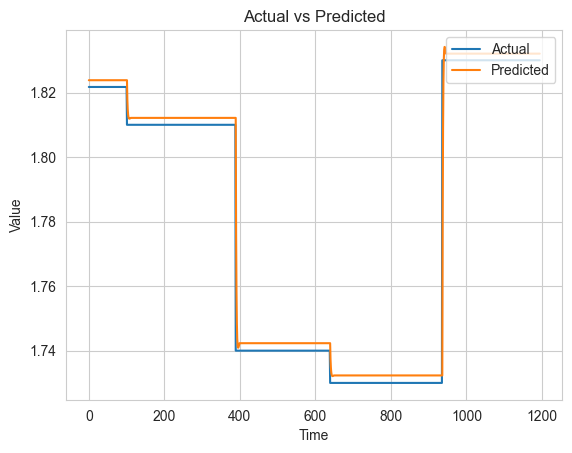

In [44]:
# Use the trained model to make predictions on the test set
test_predictions = model.predict(test_X)

# Plot the actual and predicted values
plt.plot(test_y)
plt.plot(test_predictions)
plt.title('Actual vs Predicted')
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()


In [45]:
#Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train,y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.518 (0.013)


In [48]:
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.38      0.30      0.33       655
           1       0.47      0.60      0.52       631
           2       0.39      0.31      0.35       609
           3       0.39      0.44      0.41       622

    accuracy                           0.41      2517
   macro avg       0.40      0.41      0.40      2517
weighted avg       0.40      0.41      0.40      2517

